## [1] 작업자료 세팅


### [1-1] 자료압축해제

In [ ]:
# 방법1) 작업할때 임시 만 사용: 코렙에 img_cifar.zip 파일을 업로드한뒤 압축해제
!unzip /content/fashion_mnist.zip

# 방법2) 드라이브 마운트한뒤 작업폴더에 압축자료 올려서 압축해제 (속도빠름) 또는 폴더로 통 올림



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: fashion_mnist/Trouser/2728.png  
  inflating: fashion_mnist/Trouser/2729.png  
  inflating: fashion_mnist/Trouser/273.png  
  inflating: fashion_mnist/Trouser/2730.png  
  inflating: fashion_mnist/Trouser/2731.png  
  inflating: fashion_mnist/Trouser/2732.png  
  inflating: fashion_mnist/Trouser/2733.png  
  inflating: fashion_mnist/Trouser/2734.png  
  inflating: fashion_mnist/Trouser/2735.png  
  inflating: fashion_mnist/Trouser/2736.png  
  inflating: fashion_mnist/Trouser/2737.png  
  inflating: fashion_mnist/Trouser/2738.png  
  inflating: fashion_mnist/Trouser/2739.png  
  inflating: fashion_mnist/Trouser/274.png  
  inflating: fashion_mnist/Trouser/2740.png  
  inflating: fashion_mnist/Trouser/2741.png  
  inflating: fashion_mnist/Trouser/2742.png  
  inflating: fashion_mnist/Trouser/2743.png  
  inflating: fashion_mnist/Trouser/2744.png  
  inflating: fashion_mnist/Trouser/2745.png  
  inflating: fashion_mnist/Trouser/2746.png  


### [1-2] 데이터셋 확인

In [ ]:
import numpy as np
from glob import glob

# 데이터셋 경로 (사용자가 지정)
data_dir = "/content/fashion_mnist"

# 폴더데이터 갯수, 각 7000개씩 10개클래스임
for folder in glob(data_dir+'/*'):
  print(folder, ':', len(glob(folder+'/*')))



/content/fashion_mnist/Trouser : 7000
/content/fashion_mnist/Sandal : 7000
/content/fashion_mnist/Shirt : 7000
/content/fashion_mnist/T-shirt : 7000
/content/fashion_mnist/Pullover : 7000
/content/fashion_mnist/Ankle boot : 7000
/content/fashion_mnist/Coat : 7000
/content/fashion_mnist/Bag : 7000
/content/fashion_mnist/Sneaker : 7000
/content/fashion_mnist/Dress : 7000


(28, 28, 3) 0.0 ~ 1.0


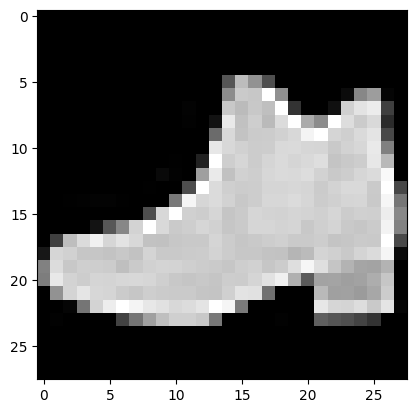

In [ ]:
path='/content/fashion_mnist/Ankle boot/003.png'
from PIL import Image
img=Image.open(path).convert('RGB')
import numpy as np

imgArr=np.array(img)/255

print(imgArr.shape,imgArr.min(), '~', imgArr.max())


import matplotlib.pyplot as plt

plt.imshow(imgArr, cmap='gray')


(28, 28)


torch.Size([3, 28, 28])

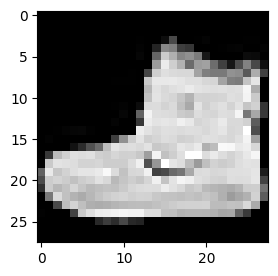

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import numpy as np

 # 흑백 → RGB 형식으로
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()  ])

img=Image.open('/content/fashion_mnist/Ankle boot/001.png')

plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray')
print(np.array(img).shape)
img=train_transform(img)
img.shape


### [1-3] 전이학습 튜닝 레이어층 확인

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

원본 크기: (28, 28, 3)
torch.Size([1, 3, 224, 224])


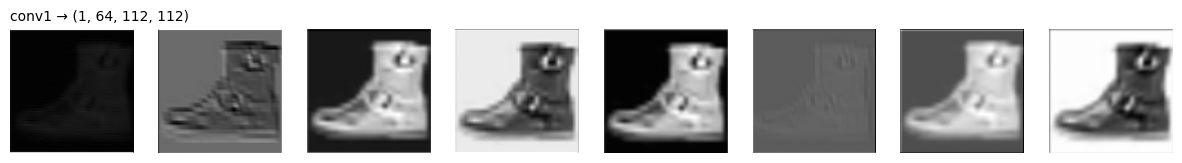

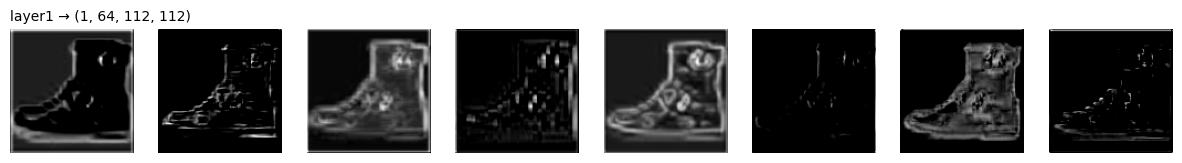

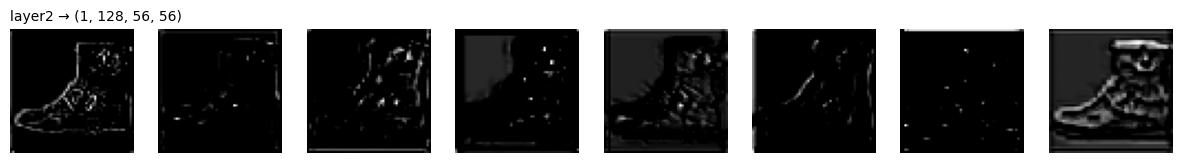

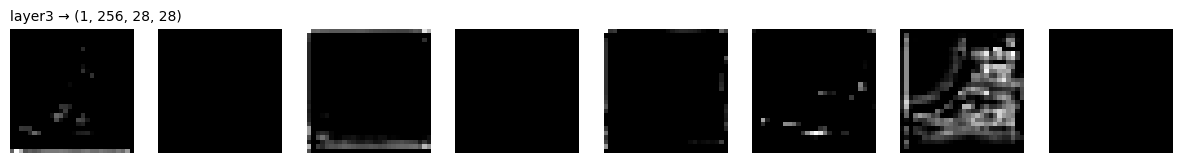

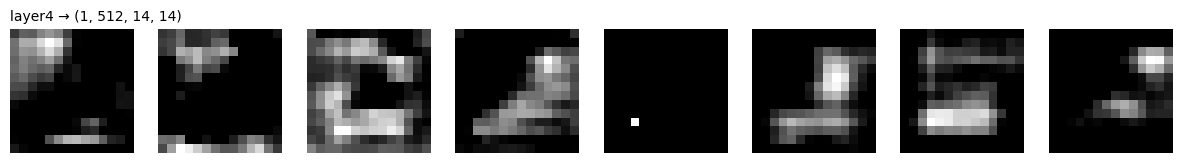

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import models, transforms
from PIL import Image
from glob import glob

# -----------------------
# 1. 샘플 이미지 로드
# -----------------------
test = glob('/content/fashion_mnist/Ankle boot/*.png')
img = Image.open(test[0]).convert("RGB")  # FashionMNIST는 흑백이지만 3채널로 맞춤
print("원본 크기:", np.array(img).shape)  # (H,W)

# -----------------------
# 2. ResNet18 모델 불러오기
# -----------------------
model = models.resnet18(weights="IMAGENET1K_V1")
model.eval()

# -----------------------
# 3. 전처리 정의
# -----------------------
transform = transforms.Compose([
    transforms.Resize((224,224)),  # ResNet 입력 크기
    transforms.ToTensor(),         # HWC → CHW, [0,255] → [0,1]
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

# -----------------------
# 4. 입력 변환
# transform(img) => 3,28,28
# -----------------------
x = transform(img).unsqueeze(0)   # [1, 3, 224, 224]
print(x.shape)

# -----------------------
# 5. 중간 레이어 Feature Map 시각화
# -----------------------
layers = dict(model.named_children())

def show_feature(name, out, max_channels=8):
    fmap = out.squeeze(0).detach().cpu()
    num = min(max_channels, fmap.shape[0])
    fig, axes = plt.subplots(1, num, figsize=(15,4))

    for i, ax in enumerate(axes if num>1 else [axes]):
        ax.imshow(fmap[i], cmap="gray")
        ax.axis("off")

    axes[0].set_title(f"{name} → {tuple(out.shape)}", fontsize=10, loc="left")
    plt.show()

out = x
for name in ["conv1", "layer1", "layer2", "layer3", "layer4"]:
    out = layers[name](out)
    show_feature(name, out)


In [ ]:
########################

텐서플로우1 (구글): 저수준 api로 어려웠음
파이토치 (페이스북): 텐서단위를 numpy처럼 사용가능하게, Cpu, GPu 를 하면서 고를수 있게함.
케라스 : 고수준 api ,코드 엄청 쉬움 (내부 잘 모름
텐서플로우2 : 케라스 기반

## [2] CNN 모델 제작

### [2-1] 모듈 임포트 및 디바이스 준비

In [ ]:
# 퀘스트3


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset

import torchvision
import torchvision.transforms as transforms
import torchvision.models as models


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pathlib import Path

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("CUDA available?", torch.cuda.is_available())
print("Device count:", torch.cuda.device_count())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU only")

CUDA available? True
Device count: 1
Device name: NVIDIA A100-SXM4-40GB


### [2-2] 데이터셋 준비



In [ ]:
from pathlib import Path
from torchvision import transforms
import torchvision
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
import numpy as np

# 1. 데이터 경로
root_dir = Path("/content/fashion_mnist")

# 2. 변환 정의
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),   # 흑백 → RGB 흉내
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

# 3. 전체 데이터셋 (train/test 변환 따로 로드)
full_dataset_train = torchvision.datasets.ImageFolder(root=root_dir, transform=train_transform)
full_dataset_test  = torchvision.datasets.ImageFolder(root=root_dir, transform=test_transform)

#  ImageFolder에는 targets 속성이 없음 → 라벨 배열 직접 생성
targets = np.array([s[1] for s in full_dataset_train.samples])

# 4. 80:20 분할 (train 80%, temp 20%)
train_idx, temp_idx = train_test_split(
    np.arange(len(full_dataset_train)),
    test_size=0.2,
    stratify=targets,
    random_state=42
)

# 5. temp(20%) → validation(10%) + test(10%) 로 stratified split
temp_targets = targets[temp_idx]
val_idx, test_idx = train_test_split(
    temp_idx,
    test_size=0.5,
    stratify=temp_targets,
    random_state=42
)

# 6. Subset 생성
train_dataset = Subset(full_dataset_train, train_idx)
val_dataset   = Subset(full_dataset_test,  val_idx)   # test_transform 적용
test_dataset  = Subset(full_dataset_test,  test_idx)

# 7. DataLoader 정의
batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

# 8. 정보 출력
print("배치 크기:", batch_size)
print("train 개수:", len(train_dataset))
print("val 개수:", len(val_dataset))
print("test 개수:", len(test_dataset))
print("전체 개수:", len(full_dataset_train))
print("클래스:", full_dataset_train.classes)


배치 크기: 256
train 개수: 56000
val 개수: 7000
test 개수: 7000
전체 개수: 70000
클래스: ['Ankle boot', 'Bag', 'Coat', 'Dress', 'Pullover', 'Sandal', 'Shirt', 'Sneaker', 'T-shirt', 'Trouser']


In [ ]:
model = models.resnet18(weights="IMAGENET1K_V1")


# 레이어 학습, 동결 구분
for name, param in model.named_parameters():
    if name.startswith(("layer3", "layer4", "fc")):
        param.requires_grad = True
    else:
        param.requires_grad = False


# conv1 입력 채널을 1로 변경
# model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# . 출력 클래스 개수에 맞게 fc 수정 (예: CIFAR-10 → 10클래스)
model.fc = nn.Linear(model.fc.in_features, 10)
model.to(device)

# . 손실함수와 옵티마이저: requires_grad=True인 파라미터만 업데이트

criterion = nn.CrossEntropyLoss()

params_to_update=[]
for p in model.parameters():
  if p.requires_grad:
    params_to_update.append(p)

# params_to_update = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.Adam(params_to_update, lr=1e-4)


In [ ]:
num_epochs = 10
early_stop_acc = 0.97   # 조기종료 기준 (val accuracy)
train_losses, val_losses, test_losses = [], [], []
train_accuracies, val_accuracies, test_accuracies = [], [], []

for epoch in range(num_epochs):
    # -------------------
    # Train
    # -------------------
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for batch_idx, (images, labels) in enumerate(train_loader, 1):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_acc = correct / total
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)

    # -------------------
    # Validation (조기종료 기준)
    # -------------------
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    epoch_val_loss = val_loss / len(val_loader)
    epoch_val_acc = correct / total
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)

    # -------------------
    # 조기 종료 체크
    # -------------------
    if epoch_val_acc >= early_stop_acc:
        print(f"⚡ Early stopping at Epoch {epoch+1} "
              f"(Val Acc {epoch_val_acc*100:.2f}%)")
        break

    # -------------------
    # Logging
    # -------------------
    print(f"[Epoch {epoch+1}] "
          f"Train Loss: {epoch_train_loss:.4f} | "
          f"Train Acc: {epoch_train_acc*100:.2f}% | "
          f"Val Loss: {epoch_val_loss:.4f} | "
          f"Val Acc: {epoch_val_acc*100:.2f}%")



[Epoch 1] Train Loss: 0.3644 | Train Acc: 87.56% | Val Loss: 0.2201 | Val Acc: 92.43%
[Epoch 2] Train Loss: 0.2077 | Train Acc: 92.58% | Val Loss: 0.1926 | Val Acc: 93.03%
[Epoch 3] Train Loss: 0.1721 | Train Acc: 93.81% | Val Loss: 0.1863 | Val Acc: 93.33%
[Epoch 4] Train Loss: 0.1475 | Train Acc: 94.73% | Val Loss: 0.1784 | Val Acc: 93.71%
[Epoch 5] Train Loss: 0.1303 | Train Acc: 95.29% | Val Loss: 0.1749 | Val Acc: 93.91%
[Epoch 6] Train Loss: 0.1130 | Train Acc: 95.88% | Val Loss: 0.1747 | Val Acc: 93.87%
[Epoch 7] Train Loss: 0.1010 | Train Acc: 96.38% | Val Loss: 0.1701 | Val Acc: 94.19%
[Epoch 8] Train Loss: 0.0892 | Train Acc: 96.80% | Val Loss: 0.1775 | Val Acc: 93.89%
[Epoch 9] Train Loss: 0.0807 | Train Acc: 97.11% | Val Loss: 0.1763 | Val Acc: 94.33%
[Epoch 10] Train Loss: 0.0677 | Train Acc: 97.63% | Val Loss: 0.1859 | Val Acc: 94.44%


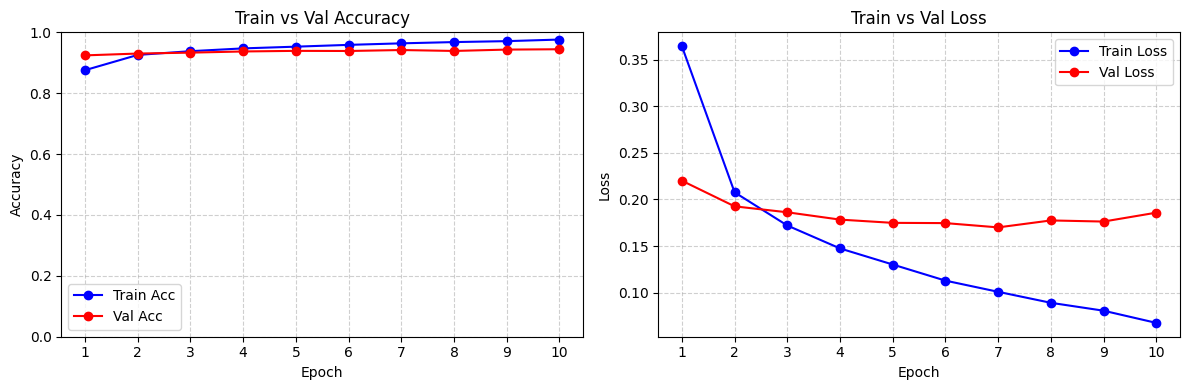

In [ ]:
import matplotlib.pyplot as plt

# train 과 val 길이에 맞춰서
min_len = min(len(train_losses), len(val_losses))
epochs = range(1, min_len + 1)

plt.figure(figsize=(12, 4))

# -------------------
# Accuracy
# -------------------
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies[:min_len], "b-o", label="Train Acc")
plt.plot(epochs, val_accuracies[:min_len], "r-o", label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train vs Val Accuracy")
plt.ylim(0, 1)
plt.xticks(epochs)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

# -------------------
# Loss
# -------------------
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses[:min_len], "b-o", label="Train Loss")
plt.plot(epochs, val_losses[:min_len], "r-o", label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Val Loss")
plt.xticks(epochs)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# -------------------
# 최종 Test 평가
# -------------------
model.eval()
test_loss, correct, total = 0.0, 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

final_test_loss = test_loss / len(test_loader)
final_test_acc = correct / total
print(f"\n[Test Result] Loss: {final_test_loss:.4f} | Acc: {final_test_acc*100:.2f}%")



[Test Result] Loss: 0.1702 | Acc: 94.59%


### 분류리포


 Classification Report:
              precision    recall  f1-score   support

  Ankle boot       0.95      0.99      0.97       700
         Bag       1.00      0.99      0.99       700
        Coat       0.91      0.94      0.92       700
       Dress       0.95      0.94      0.95       700
    Pullover       0.92      0.93      0.92       700
      Sandal       1.00      0.99      0.99       700
       Shirt       0.86      0.83      0.84       700
     Sneaker       0.98      0.95      0.97       700
     T-shirt       0.89      0.90      0.90       700
     Trouser       1.00      0.99      1.00       700

    accuracy                           0.95      7000
   macro avg       0.95      0.95      0.95      7000
weighted avg       0.95      0.95      0.95      7000



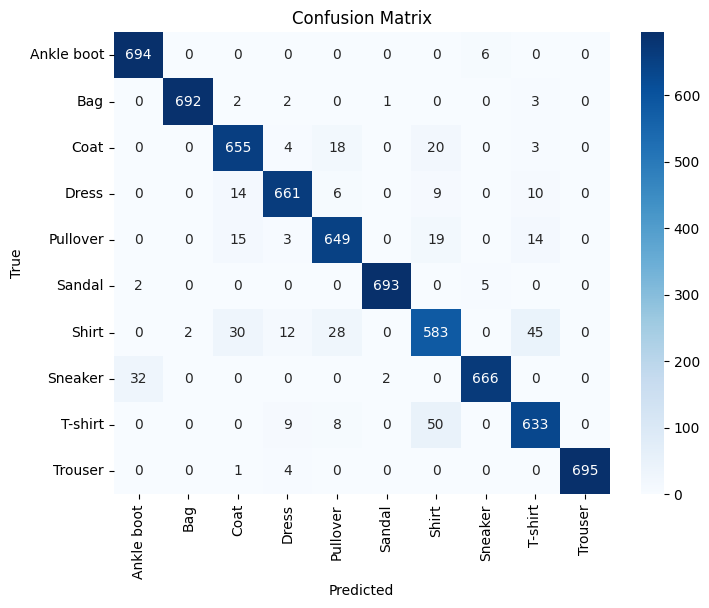

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------
# 예측값, 정답값 수집
# -------------------
all_preds, all_labels = [], []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# -------------------
# 분류 리포트
# -------------------
target_names = full_dataset_test.classes  # ✅ 여기 고침
print("\n Classification Report:")
print(classification_report(all_labels, all_preds, target_names=target_names))

# -------------------
# Confusion Matrix
# -------------------
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


## 추론

In [ ]:
from PIL import Image, ImageOps
import torchvision.transforms as transforms
import torch

# 1. 이미지 불러오기
img_path = "/content/추론img.png"
img = Image.open(img_path).convert("L")   # Grayscale
#img = Image.open(img_path).convert("RGB")   # Grayscale

# 2. 색 반전 (배경 흑색, 개체 흰색)
img = ImageOps.invert(img)

# 3. Transform 정의 (ResNet 입력용)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),   # 1채널 → 3채널
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

# 5. 최종 텐서 변환
x = transform(img).unsqueeze(0).to(device)

# 6. 추론
model.eval()
with torch.no_grad():
    outputs = model(x)
    _, pred = torch.max(outputs, 1)

target_names = full_dataset_test.classes
print(f"예측 클래스: {target_names[pred.item()]}")


예측 클래스: Ankle boot


#모델 저장


In [ ]:
# 전체 모델 저장
torch.save(model.state_dict(), "fashion_resnet18.pth")
print(" 모델 저장 완료: fashion_resnet18.pth")
